# Dynamic Programming Problem Set

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

## Problem 1:
### Asset market equilibrium

#### Optimization equation:
$$
\max_{c_s^h}U^h(v(c_o^h))+\frac{1}{S}\sum_s v(c_s^h) \quad given \; c_o^h = e_o^h - q_1\theta_1^h-q_2\theta_2^h
\qquad \qquad \qquad \qquad \qquad \qquad \quad c_s^h = e_s^h - A^1_s\theta_1^h-A^2_s\theta_2^h
$$

#### First Order Conditions: 
$$
q_1v'(c_o^h)=  \frac{1}{S}\sum_s v'(c_s^h) A^1_s \\
q_2v'(c_o^h)=  \frac{1}{S}\sum_s v'(c_s^h) A^2_s \\
$$

#### Market Clearing conditions:
$$
\theta_1^1+\theta_1^2 = 0 \\
\theta_2^1+\theta_2^2 = 0 
$$

In [2]:
gamma = 2
# Function for v prime
def fn_v_p(c):
    v_p = np.power(c, -gamma)
    return v_p
# Function for c0
def fn_c0(e0, q1, q2, theta1, theta2):
    c0 = e0 - q1*theta1 - q2*theta2
    return c0
# Function for c_s
def fn_c_s(e_s, A1, A2, theta1, theta2):
    c_s = e_s + A1*theta1 + A2*theta2
    return c_s
# Feeding the parameters before calling the function
H = 2
S = 4
A1 = [1,1,1,1]
A2 = [1,1,1.5,1.5]
e1 = [1,1,2,1,2]
e2 = [1,3,1,3,1]

# Function to optimize
def fn_max(variables):
    (q1, q2, theta11, theta21, theta12, theta22) = variables
# def fn_max(q1, q2, theta1[0], theta2[0], theta1[1], theta2[1]):
    # computing c0
    c0 = np.zeros(H)
    c0[0] = fn_c0(e1[0], q1, q2, theta11, theta21)
    c0[1] = fn_c0(e2[0], q1, q2, theta12, theta22)
    # computing c_s
    c_s = np.zeros((H, S))
    for j in range(S):
        c_s[0,j]=fn_c_s(e1[j+1], A1[j], A2[j], theta11, theta21)
        c_s[1,j]=fn_c_s(e1[j+1], A1[j], A2[j], theta12, theta22)
    # Final value
    fv11 = 0
    fv21 = 0
    fv12 = 0
    fv22 = 0
    for j in range(S):
        fv11 += fn_v_p(c_s[0,j]) * A1[j]
        fv21 += fn_v_p(c_s[0,j]) * A2[j]
        fv12 += fn_v_p(c_s[1,j]) * A1[j]
        fv22 += fn_v_p(c_s[1,j]) * A2[j]
    fv11 = q1*fn_v_p(c0[0]) - (1/S)*fv11
    fv21 += q2*fn_v_p(c0[0]) - (1/S)*fv21
    fv12 += q1*fn_v_p(c0[1]) - (1/S)*fv12
    fv22 += q2*fn_v_p(c0[1]) - (1/S)*fv22
    # Market Clearing condition
    fm1 = theta11 + theta21
    fm2 = theta12 + theta22
    return (fv11, fv21, fv12, fv22, fm1, fm2)

arr_gamma = [2, 4, 8, 166]
for idx, gamma in enumerate(arr_gamma):
    print(f"gamma value = {gamma}")
    (q1, q2, theta11, theta21, theta12, theta22) = fsolve(fn_max, (1, 1, 1, 1, 1, 1))
    print(f"(q1, q2, theta11, theta21, theta12, theta22) =\n{q1, q2, theta11, theta21, theta12, theta22}")

gamma value = 2
(q1, q2, theta11, theta21, theta12, theta22) =
(-1.028728221497213, -1.0346719786607224, -122.60594112788344, 122.95802909407965, -12.752809643322706, 12.743525670583711)
gamma value = 4
(q1, q2, theta11, theta21, theta12, theta22) =
(0.8728233929655814, 1.3605031767333975, 0.7404521799643086, 0.9922413160875077, 0.7432511349693468, 0.9894407371703116)
gamma value = 8
(q1, q2, theta11, theta21, theta12, theta22) =
(-2158.9050528546777, -138979.65062325605, 142192.41165951046, -142192.20700522006, 175356.59419119728, -175356.35584761755)
gamma value = 166
(q1, q2, theta11, theta21, theta12, theta22) =
(1.0, 1.0, 1.0, 1.0, 1.0, 1.0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


## Problem 2:
### Tic-Tac-Toe

## Problem 3:
### Ramsey I


$$
\max_{c_t} E\beta^t U(c_t) \qquad \text{subject to: }c_t + k' = f(k_t,s)
$$

The Bellman Equation:
$$
V(k,s) = \max u(c) + \beta \sum_{s'}p(k',s')V(k',s') \qquad \text{subject to: }c_t + k' = f(k_t,s)
$$

where $u(c)=log(c)$ and $f(k,s)= \begin{cases}0.9 k^{0.3}+0.3k \quad for\;s =1 \\ 1.1 k^{0.3}+0.9k \quad for\;s =2\end{cases}$

The upper and lower bound of $k$ in ($\bar{k}$, $\underline{k}$) is derived from
The steady state condition in can be found using from:
$$
k^* = f'^{-1}(\frac{1}{\beta})
$$

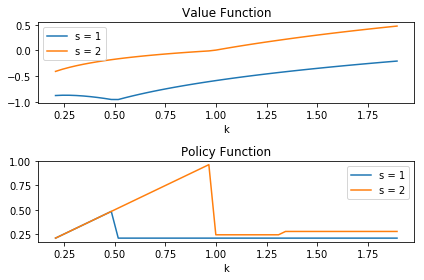

In [3]:
beta = 0.9 # Beta value used in the process
N = 50 # number of grid-points for the capital grid
S = 2 # Two-state problem
pi1 = 0.5
pi2 = 0.5
tol = 1e-5 # set the tolerance level
itr_max = 10000 # Maximum iterations

# Define the production function
def fn(k, s):
    if s == 1: 
        a = 0.9
        b = 0.3
    elif s == 2:
        a = 1.1
        b = 0.9
    else:
        print(s)
        raise ValueError('s can only have value 1 or 2')
    f_k = a*k**0.3 + b*k
    return f_k
# Derivative of f
def f_prime(k, s):
    if s == 1: 
        a = 0.9
        b = 0.3
    elif s == 2:
            a = 1.1
            b = 0.9
    else:
        print(s)
        raise ValueError('s can only have value 1 or 2')
    fp_k = 0.3*a*k**(-0.7) + b
    return fp_k
# Function to find k*
def ss_k(s): 
    if s == 1: 
        a = 0.9
        b = 0.3
    elif s == 2:
        a = 1.1
        b = 0.9
    else:
        raise ValueError('s can only take values of 1 or 2')
    k_star = ((1/beta - b)/(0.3*a))**(-1/0.7)
    return k_star

k_low = np.min((ss_k(1), ss_k(2))) # lower bound for the capital grid
k_high = np.max((ss_k(1), ss_k(2))) # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N) #grid for capital

# Initialize the value function for two states
V_init = np.zeros((S, N))
V_old = V_init.copy()
V_new = np.zeros_like(V_init)
c = np.zeros_like(V_init)
u = np.zeros_like(V_init)
ind = [0,0]
p_k = np.zeros_like(V_init)
for itr in range(itr_max):
    for i,k in enumerate(k_grid):    #loop through today's capital
        c[0,:] = fn(k, 1) - k_grid # consumption implied by policy k_next in state 1
        c[1,:] = fn(k, 2) - k_grid  # consumption implied by policy k_next in state 2
        u[c > 0] = np.log(c[c > 0] )
        u[c <= 0] = -1e6 # set value to a large negetive no. for negative consumption
        action_value = u + beta * (pi1*V_old[0,:] + pi2* V_old[1,:]) 
        V_new[:,i] = np.amax(action_value, axis=1)
        ind = np.argmax(action_value, axis=1)
        p_k[:,i] = k_grid[ind]
        V_old = V_new.copy()
    if np.linalg.norm(V_new - V_old) < tol:
        break

# Plot the functions
plt.subplot(2, 1, 1) # Value function
plt.plot(k_grid, V_new[0,:], label="s = 1")
plt.plot(k_grid, V_new[1,:], label="s = 2")
plt.xlabel("k")
plt.legend()
plt.title("Value Function")
plt.tight_layout()
plt.subplot(2, 1, 2) # Policy function
plt.plot(k_grid, p_k[0,:], label="s = 1")
plt.plot(k_grid, p_k[1,:], label="s = 2")
plt.xlabel("k")
plt.legend()
plt.title("Policy Function")
plt.tight_layout()
plt.show()

## Problem 4: